In [1]:
!date

vie ene 10 18:17:16 CET 2020


In [2]:
# Active system's automagic
%automagic on


Automagic is ON, % prefix IS NOT needed for line magics.


In [3]:
# Load work environment

In [4]:
import os
os.getcwd()

'/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/03_Presentation'

In [5]:
#folder = '/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/03_Presentation'
folder = os.getcwd()
!ls {folder}

01_Loading_and_preprocessing_original_data.ipynb
01_OUT_csv_original_data_transformed.csv
02_Sample_draw_transformed_data.ipynb
03_Sample_data_preparation_and_pipelines_of_naive_models.ipynb
04a_Sample_ROC_auc_SVC_svm_hyperparameters.ipynb
04b_Sample_ROC_auc_LOGREG_SAG_hyperparameters.ipynb
04c_Sample_ROC_auc_LOGREG_SAGA_hyperparameters.ipynb
04_Sample_automatic_hyperparameter_search.ipynb
05_Apply_final_LOGREG_SAG_model.ipynb
06_Apply_final_ROC_auc_LOGREG_SAG_complete.ipynb


In [6]:
os.chdir(folder)
os.getcwd()

'/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/03_Presentation'

In [7]:
# Load library for work and analitics data
import pandas as pd
import numpy as np

In [8]:
!ls -ltr ../03_Presentation/01_OUT_csv_original_data_transformed.csv

-rw-rw-r-- 1 dsc dsc 27565813 ene 10 15:18 ../03_Presentation/01_OUT_csv_original_data_transformed.csv


In [9]:
# Read from excel files complete with column names stipulated and transform them
# (1) Imports:
import os
import glob

In [10]:
# (2) File list:
path = os.chdir(os.getcwd() + '/..' + '/03_Presentation')
!pwd

/home/dsc/Repos/TFM_Categorize_providers_based_on_descriptions_of_the_drug_plans/03_Presentation


In [11]:
%%time
# (3) Upload cvsv file:
df_from_xlsx_total = pd.read_csv("01_OUT_csv_original_data_transformed.csv")

CPU times: user 486 ms, sys: 75.7 ms, total: 562 ms
Wall time: 512 ms


In [12]:
len(df_from_xlsx_total)

306183

In [13]:
df_from_xlsx_total.columns

Index(['ESTADO', 'CONDADO', 'ORGANIZACION', 'TIPO_PLAN_GENERICO_MEDICARE',
       'PRIMA_MENSUAL_CONSOLIDADA', 'MEDICAMS_ANUALES_DEDUCIBLES',
       'TIPO_BENEFICIO', 'COBERTURA_ADICIONAL_OFRECIDA', 'DETALLE_BENEFICIO',
       'DESEMBOLSO_MAXIMO', 'CLASIFICACION'],
      dtype='object')

In [14]:
# Data mapping

In [15]:
df_ratings_lab_ohe_sample = df_from_xlsx_total.sample(n=10000, random_state=888).reset_index(drop=True).copy()

In [16]:
df_ratings_lab_ohe_sample["ESTADO"] = df_ratings_lab_ohe_sample["ESTADO"].astype(np.str)
df_ratings_lab_ohe_sample["CONDADO"] = df_ratings_lab_ohe_sample["CONDADO"].astype(np.str)
df_ratings_lab_ohe_sample["ORGANIZACION"] = df_ratings_lab_ohe_sample["ORGANIZACION"].astype(np.str)
df_ratings_lab_ohe_sample["TIPO_PLAN_GENERICO_MEDICARE"] = df_ratings_lab_ohe_sample["TIPO_PLAN_GENERICO_MEDICARE"].astype(np.str)
df_ratings_lab_ohe_sample["PRIMA_MENSUAL_CONSOLIDADA"] = df_ratings_lab_ohe_sample["PRIMA_MENSUAL_CONSOLIDADA"].astype(np.float64)
df_ratings_lab_ohe_sample["MEDICAMS_ANUALES_DEDUCIBLES"] = df_ratings_lab_ohe_sample["MEDICAMS_ANUALES_DEDUCIBLES"].astype(np.float64)
df_ratings_lab_ohe_sample["TIPO_BENEFICIO"] = df_ratings_lab_ohe_sample["TIPO_BENEFICIO"].astype(np.str)
df_ratings_lab_ohe_sample["COBERTURA_ADICIONAL_OFRECIDA"] = df_ratings_lab_ohe_sample["COBERTURA_ADICIONAL_OFRECIDA"].astype(np.str)
df_ratings_lab_ohe_sample["DETALLE_BENEFICIO"] = df_ratings_lab_ohe_sample["DETALLE_BENEFICIO"].astype(np.str)
df_ratings_lab_ohe_sample["DESEMBOLSO_MAXIMO"] = df_ratings_lab_ohe_sample["DESEMBOLSO_MAXIMO"].astype(np.float64)
df_ratings_lab_ohe_sample["CLASIFICACION"] = df_ratings_lab_ohe_sample["CLASIFICACION"].astype(np.str)

In [17]:
# Labeling through Label Encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder() 

In [18]:
df_ratings_lab_ohe_sample['ESTADO']= lab.fit_transform(df_ratings_lab_ohe_sample['ESTADO'])
df_ratings_lab_ohe_sample['CONDADO']= lab.fit_transform(df_ratings_lab_ohe_sample['CONDADO'])
df_ratings_lab_ohe_sample['ORGANIZACION']= lab.fit_transform(df_ratings_lab_ohe_sample['ORGANIZACION'])
#df_ratings_lab_ohe_sample['PLAN']= lab.fit_transform(df_ratings_lab_ohe_sample['PLAN'])
df_ratings_lab_ohe_sample['TIPO_PLAN_GENERICO_MEDICARE']= lab.fit_transform(df_ratings_lab_ohe_sample['TIPO_PLAN_GENERICO_MEDICARE'])
df_ratings_lab_ohe_sample['PRIMA_MENSUAL_CONSOLIDADA']= lab.fit_transform(df_ratings_lab_ohe_sample['PRIMA_MENSUAL_CONSOLIDADA'])
df_ratings_lab_ohe_sample['MEDICAMS_ANUALES_DEDUCIBLES']= lab.fit_transform(df_ratings_lab_ohe_sample['MEDICAMS_ANUALES_DEDUCIBLES'])
df_ratings_lab_ohe_sample['TIPO_BENEFICIO']= lab.fit_transform(df_ratings_lab_ohe_sample['TIPO_BENEFICIO'])
df_ratings_lab_ohe_sample['COBERTURA_ADICIONAL_OFRECIDA']= lab.fit_transform(df_ratings_lab_ohe_sample['COBERTURA_ADICIONAL_OFRECIDA'])
df_ratings_lab_ohe_sample['DETALLE_BENEFICIO']= lab.fit_transform(df_ratings_lab_ohe_sample['DETALLE_BENEFICIO'])
#df_ratings_lab_ohe_sample['CONTRATO_ID']= lab.fit_transform(df_ratings_lab_ohe_sample['CONTRATO_ID'])
#df_ratings_lab_ohe_sample['PLAN_ID']= lab.fit_transform(df_ratings_lab_ohe_sample['PLAN_ID'])
#df_ratings_lab_ohe_sample['SEGMENTO_ID']= lab.fit_transform(df_ratings_lab_ohe_sample['SEGMENTO_ID'])
df_ratings_lab_ohe_sample['DESEMBOLSO_MAXIMO']= lab.fit_transform(df_ratings_lab_ohe_sample['DESEMBOLSO_MAXIMO'])
#df_ratings_lab_ohe_sample['CLASIFICACION']= lab.fit_transform(df_ratings_lab_ohe_sample['CLASIFICACION'])

In [19]:
# Load variables with sample data.
X = np.array(df_ratings_lab_ohe_sample.drop('CLASIFICACION', 1))
y = np.array(df_ratings_lab_ohe_sample["CLASIFICACION"])
X.shape

(10000, 10)

In [20]:
y.shape

(10000,)

In [21]:
y

array(['3', '4', '3', ..., '3.5', '3.5', '4'], dtype=object)

In [22]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

In [23]:
# Binarize the output
classes_label=['2', '2.5', '3', '3.5', '4', '4.5', '5', 'NO_ASIGNADO']
y = label_binarize(y, classes=classes_label)
n_classes = y.shape[1]

In [24]:
classes_label[0]

'2'

In [25]:
y

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
y.dtype

dtype('int64')

In [27]:
# Train-test split and load the library
from sklearn.model_selection import train_test_split
# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=888)

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [30]:
# Create the encoder (by OneHotEncoder)
encoder = OneHotEncoder(handle_unknown='ignore')
# Assume for simplicity all features are categorical.
encoder.fit(X_train)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [31]:
# Apply the encoder.
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

In [32]:
#classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=888))
from sklearn.linear_model.sag import sag_solver
from sklearn import linear_model
classifier = OneVsRestClassifier(linear_model.LogisticRegression(class_weight='balanced', multi_class='auto', solver='sag', max_iter=10000, random_state=888))

In [33]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [34]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [35]:
def cycle(iterable):
    # cycle('ABCD') --> A B C D A B C D A B C D ...
    saved = []
    for element in iterable:
        yield element
        saved.append(element)
    while saved:
        for element in saved:
              yield element

### Plots Receiver operating characterictic for each class

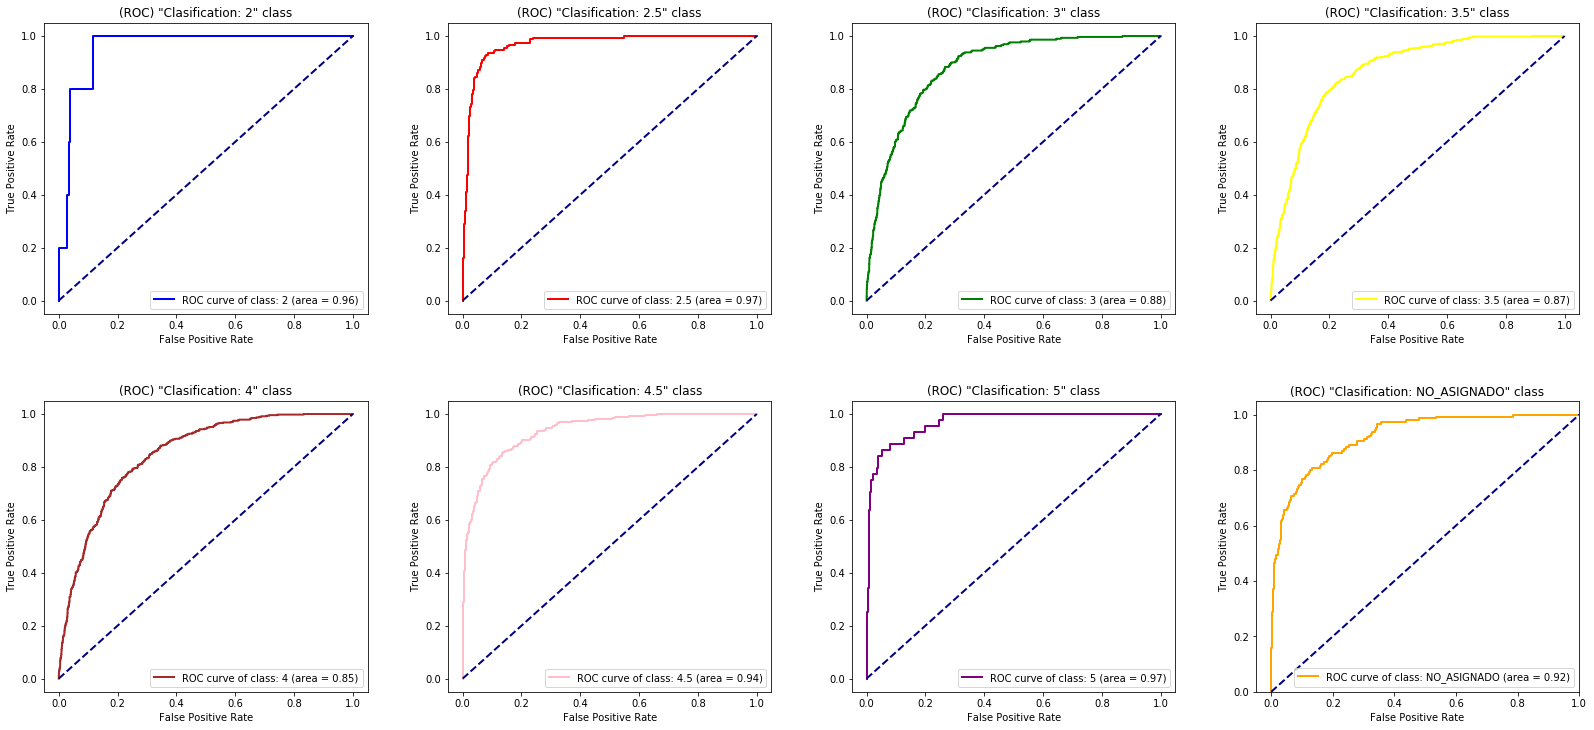

In [36]:
import matplotlib.pyplot as plt

#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#fig, axes = plt.subplots(2, 4, figsize=(18, 4), constrained_layout=True)
fig, axes = plt.subplots(2, 4, figsize=(22, 10), constrained_layout=True)
fig.set_constrained_layout_pads(w_pad=1./36., h_pad=1./36., hspace=0.1, wspace=0.1)

### Plot Receiver operating characterictic for "Clasification 2" class
#Plot of a ROC curve for a specific class
colors = 'blue' #, 'blue', 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
lw = 2
i=0
axes[0,0].plot(fpr[i], tpr[i], color=colors,
         lw=lw, label='ROC curve of class: %s (area = %0.2f)' % (classes_label[i], roc_auc[i]))

axes[0,0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].set_title('(ROC) "Clasification: %s" class' % (classes_label[i]))
axes[0,0].legend(loc="lower right")

### Plot Receiver operating characterictic for "Clasification 2.5" class
#Plot of a ROC curve for a specific class
colors = 'red' #, 'blue', 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
#plt.figure()
lw = 2
i=1
axes[0,1].plot(fpr[i], tpr[i], color=colors,
         lw=lw, label='ROC curve of class: %s (area = %0.2f)' % (classes_label[i], roc_auc[i]))

axes[0,1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].set_title('(ROC) "Clasification: %s" class' % (classes_label[i]))
axes[0,1].legend(loc="lower right")

### Plot Receiver operating characterictic for "Clasification 3" class
#Plot of a ROC curve for a specific class
colors = 'green' #, 'blue', 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
#plt.figure()
lw = 2
i=2
axes[0,2].plot(fpr[i], tpr[i], color=colors,
         lw=lw, label='ROC curve of class: %s (area = %0.2f)' % (classes_label[i], roc_auc[i]))

axes[0,2].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
axes[0,2].set_xlabel('False Positive Rate')
axes[0,2].set_ylabel('True Positive Rate')
axes[0,2].set_title('(ROC) "Clasification: %s" class' % (classes_label[i]))
axes[0,2].legend(loc="lower right")

### Plot Receiver operating characterictic for "Clasification 3.5" class
#Plot of a ROC curve for a specific class
colors = 'yellow' #, 'blue', 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
#plt.figure()
lw = 2
i=3
axes[0,3].plot(fpr[i], tpr[i], color=colors,
         lw=lw, label='ROC curve of class: %s (area = %0.2f)' % (classes_label[i], roc_auc[i]))

axes[0,3].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
axes[0,3].set_xlabel('False Positive Rate')
axes[0,3].set_ylabel('True Positive Rate')
axes[0,3].set_title('(ROC) "Clasification: %s" class' % (classes_label[i]))
axes[0,3].legend(loc="lower right")

### Plot Receiver operating characterictic for "Clasification 4" class
#Plot of a ROC curve for a specific class
colors = 'brown' #, 'blue', 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
#plt.figure()
lw = 2
i=4
axes[1,0].plot(fpr[i], tpr[i], color=colors,
         lw=lw, label='ROC curve of class: %s (area = %0.2f)' % (classes_label[i], roc_auc[i]))

axes[1,0].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
axes[1,0].set_xlabel('False Positive Rate')

axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].set_title('(ROC) "Clasification: %s" class' % (classes_label[i]))
axes[1,0].legend(loc="lower right")

### Plot Receiver operating characterictic for "Clasification 4.5" class
#Plot of a ROC curve for a specific class
colors = 'pink' #, 'blue', 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
#plt.figure()
lw = 2
i=5
axes[1,1].plot(fpr[i], tpr[i], color=colors,
         lw=lw, label='ROC curve of class: %s (area = %0.2f)' % (classes_label[i], roc_auc[i]))

axes[1,1].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].set_title('(ROC) "Clasification: %s" class' % (classes_label[i]))
axes[1,1].legend(loc="lower right")

### Plot Receiver operating characterictic for "Clasification 5" class
#Plot of a ROC curve for a specific class
colors = 'purple' #, 'blue', 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
#plt.figure()
lw = 2
i=6
axes[1,2].plot(fpr[i], tpr[i], color=colors,
         lw=lw, label='ROC curve of class: %s (area = %0.2f)' % (classes_label[i], roc_auc[i]))

axes[1,2].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
axes[1,2].set_xlabel('False Positive Rate')
axes[1,2].set_ylabel('True Positive Rate')
axes[1,2].set_title('(ROC) "Clasification: %s" class' % (classes_label[i]))
axes[1,2].legend(loc="lower right")

### Plot Receiver operating characterictic for "Clasification NO_ASIGNADO" class
#Plot of a ROC curve for a specific class
colors = 'orange' #, 'blue', 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
#plt.figure()
lw = 2
i=7
axes[1,3].plot(fpr[i], tpr[i], color=colors,
         lw=lw, label='ROC curve of class: %s (area = %0.2f)' % (classes_label[i], roc_auc[i]))

axes[1,3].plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
axes[1,3].set_xlabel('False Positive Rate')
axes[1,3].set_ylabel('True Positive Rate')
axes[1,3].set_title('(ROC) "Clasification: %s" class' % (classes_label[i]))
axes[1,3].legend(loc="lower right")

### Plots Receiver operating characterictic for multiclass

In [37]:
# Area under ROC for the multiclass problem
y_prob = classifier.predict_proba(X_test)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [39]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# (Agrega las contribuciones de todas las clases para calcular el promedio)
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [40]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

# Un macro-promedio calcula la métrica independiente para cada clase y luego toma el promedio.
# Por tanto, tratará a todas las clases por igual.
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


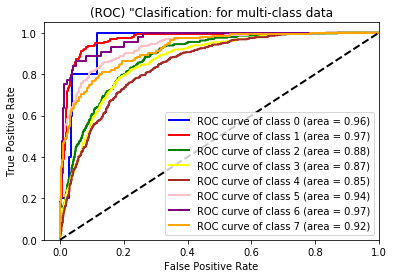

In [41]:
# Plot ROC curves for the multilabel problem
colors = cycle(['blue', 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) "Clasification: for multi-class data')
plt.legend(loc="lower right")
plt.show()

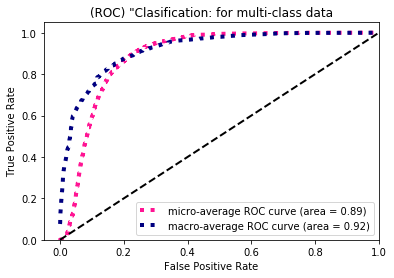

In [42]:
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) "Clasification: for multi-class data')
plt.legend(loc="lower right")
plt.show()

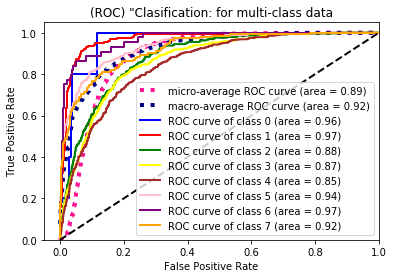

In [43]:
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['blue', 'red', 'green', 'yellow', 'brown', 'pink', 'purple', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) "Clasification: for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [44]:
!date

vie ene 10 18:18:49 CET 2020
